### What is Naive Bayes algorithm?
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

<img src ='nb.png'>

naive bayes, bayes theoremAbove,

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.

### How Naive Bayes algorithm works?
Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

naive bayes, probability, example

<img src ='nb1.png'>

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

Problem: Players will play if weather is sunny. Is this statement is correct?

We can solve it using above discussed method of posterior probability.

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.

In [2]:
import pandas as pd

In [29]:
data =  pd.read_csv('adult.csv')
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.describe()       #6 numerical attributes

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.skew()              # always skew should be less. but in this case we can see variation. so there exists a skewness

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

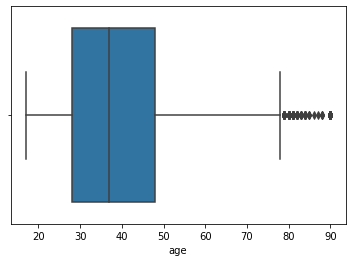

In [8]:
import seaborn as sb
sb.boxplot(data.age)              # too many outliers  for age

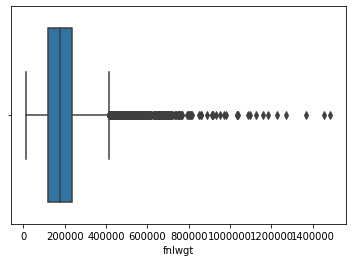

In [10]:
sb.boxplot(data.fnlwgt)          # too many outliers for fnlwgt

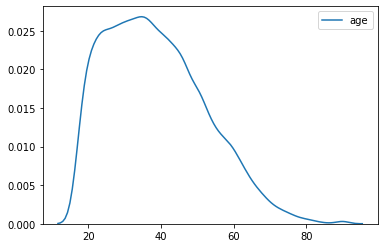

In [11]:
sb.kdeplot(data.age)

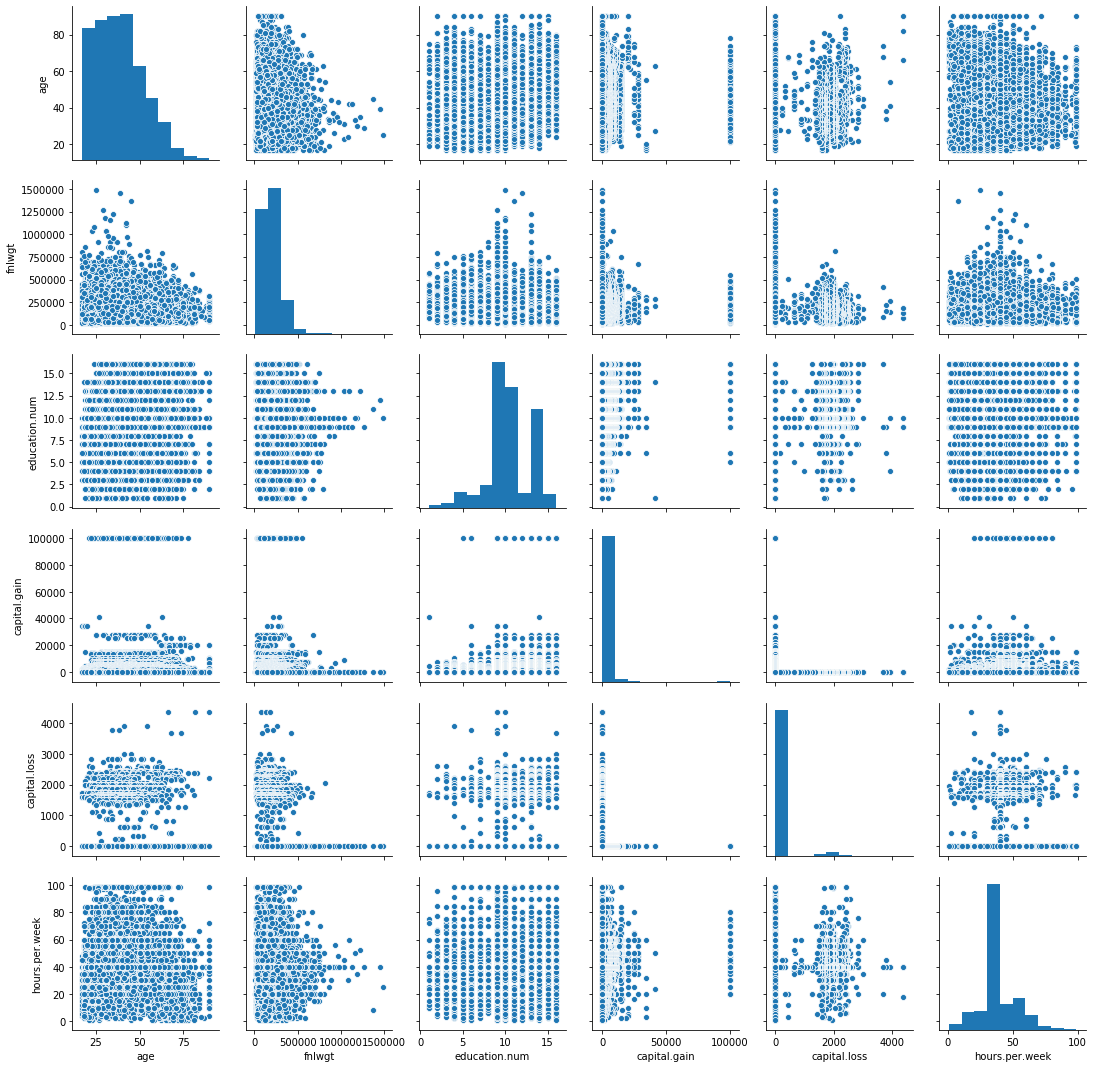

In [13]:
sb.pairplot(data)

In [15]:
data.shape

(32561, 15)

In [16]:
t = data._get_numeric_data().dropna()          # by dropping null , we are dropping 9 coolumns. so this is not a good method
t.shape

(32561, 6)

In [17]:
data.corr()                  # no much correlation between numerical values

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [32]:
data[data=='?'].count() / len(data) *100    # by this we can see missing values in 3 columns

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [33]:
data[data=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [37]:
data.workclass.mode()[0]         # mode for workclass

'Private'

In [39]:
data.workclass.value_counts()   # we can use mode imputation for workclass

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [34]:
data['workclass']=data['workclass'].replace(data[data['workclass']=='?']['workclass'],'Private')


In [35]:
data.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [38]:
data.occupation.value_counts()            # we cant use mode imputation here. 

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
data['occupation']=data['occupation'].replace(data[data['occupation']=='?']['occupation'],'Prof-specialty')
data['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [41]:
data['native.country'].value_counts()           # we can use mode imputation here

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [36]:
data['native.country']=data['native.country'].replace(data[data['native.country']=='?']['native.country'],'United-States')
data['native.country'].value_counts()


United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [38]:
data[data=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [39]:
# education and education.num are same. so we can drop education columns



In [41]:
import os

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [42]:
#data cleaning and preprocessing

le =LabelEncoder()
for col in data.columns:
    if data[col].dtype == type(object):
        data[col] = le.fit_transform(data[col])
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [47]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [48]:
x=data.iloc[:,:-1].values 
y=data['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#80% training data , 20% test data

In [62]:
#different naive bayes methods. Decision should be concept based. not try with all and come to conclusion



gnb = GaussianNB()  # most of the attributes have continuous data(height,weight,age)

#gnb = BernoulliNB() # binary data(male/female, black/whie)

#gnb = MultinomialNB() #most attributeshave discrete data(age,frequency)(pure numbers without fraction)

In [65]:
from time import time
tStart = time()
gnb.fit(x_train,y_train)
tEnd = time()
print('training time:', round(tEnd-tStart,3), "sec")

#making predictions on the testing set
y_pred = gnb.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred)*100)

training time: 0.028 sec
accuracy: 79.79425763856901


In [66]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is: ', cm, sep='\n')

confusion matrix is: 
[[4717  249]
 [1067  480]]


In [69]:
probs = gnb.predict_proba(x_test)

probs
# here we have 2 classes. 0 or 1

array([[9.94144196e-01, 5.85580365e-03],
       [9.99255064e-01, 7.44936415e-04],
       [9.97242175e-01, 2.75782509e-03],
       ...,
       [1.06218146e-03, 9.98937819e-01],
       [9.97162461e-01, 2.83753871e-03],
       [9.82650354e-01, 1.73496462e-02]])

In [76]:
# keep probability of the positive class only

prob_positive = probs[:,1]     

#fpr - false positive rate
#tpr- true positive rate
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('area under the curve:', roc_auc)
print(threshold.shape)

area under the curve: 0.8221662313427494
(1628,)


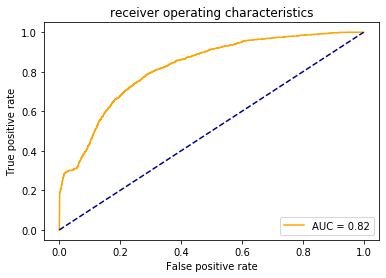

In [72]:
#plot ROC curve

import matplotlib.pyplot as plt
plt.title('receiver operating characteristics')
plt.plot(fpr, tpr, 'orange', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1],color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()